<a href="https://colab.research.google.com/github/ghizlanebo/nltk/blob/main/LDA_TFIDF_BOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True) #do not miss this line

import warnings
warnings.filterwarnings("ignore")

In [2]:
papers = pd.read_excel('/content/drive/MyDrive/REC_CG_19-21.xlsx')
# Print head
papers.head()

,Rec_DateEnvoi,Rec_Id,Typeaccueil,MotifTypeLibFr,Motif_Lib,Rec_EtatType_Lib,Rec_DateEtat,descri
0,2019-01-21 14:27:00,1,Visite,Réclamation,Remises en paiement,Traité,2019-06-17 16:29:00,- Concerné(s): MOHAMED & OUMAIMA - Situation...
1,2020-05-29 10:37:00,2,Téléphone,Demande de renseignement,Allocations Familiales,Traité,2020-05-29 10:44:00,L’intéressé a réclame date de naissance de en...
2,2019-11-27 11:07:00,3,Téléphone,Demande de renseignement,Précomptes,Traité,2019-11-27 11:08:00,"672,00DH] [ATD DEFENSE"
3,2020-12-08 10:12:00,4,Visite,Nonaffiché,Autre,Traité,2020-12-08 10:12:00,Attestation pension
4,2020-12-08 10:08:00,5,Téléphone,Demande de renseignement,Pension principale,Traité,2020-12-08 10:11:00,"RAPPEL : [ 9018,52DH] [PREMIER ARRERAGE"


In [3]:
# Remove the columns
papers = papers.drop(columns=['Rec_Id', 'Rec_DateEtat'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,Rec_DateEnvoi,Typeaccueil,MotifTypeLibFr,Motif_Lib,Rec_EtatType_Lib,descri
166901,2020-11-24 10:40:00,Téléphone,Réclamation,Nouvelles naissance (AF),Traité,"L’enfant ""OMAR"" traité au niveau BDD"
113481,2020-09-07 14:15:00,Téléphone,Demande de renseignement,Affiliation et suivi de carrière,Traité,simulation
23097,2019-02-21 14:56:00,Visite,Remise d'attestation,Précomptes,Traité,7 attestation de pension délivré a l’ intéresse
354586,2020-03-04 15:39:00,Téléphone,Demande de renseignement,Pension principale,Traité,certificat de vie non encore reçu ;
189973,2020-12-29 11:18:00,Téléphone,Demande de renseignement,Pension principale,Traité,2020-12-07 14:17:01 | Certifie coti | Liquidation


In [4]:
l=papers['descri'].tolist()

In [5]:
corpus=[]
a=[]
for i in range(len(l)):
        a=l[i]
        corpus.append(a)
        
corpus[0:10]

['L’enfant "OMAR" traité au niveau BDD',
 'simulation',
 '7 attestation de pension délivré a l’ intéresse',
 'certificat de vie non encore reçu ;',
 '2020-12-07 14:17:01 | Certifie coti | Liquidation',
 'affect',
 'Simulation 2020 : 11876.95 dh',
 'Dépôt C de vie + photocopie de la CIN',
 'Dde d’info',
 'prob dcp']

In [6]:
my_stop_words= ['cmr','bonjour','merci','comme', 'si', 'faire', 'cette', 'aussi', 'ainsi', 'toutes','beaucoup', 'faut', 'falloir',
              'cela', 'va', 'aller', 'là', 'ça','peux', 'pouvoir', 'quand', 'encore', 'donc', 'toujours', 
              'où','quelques', 'autre', 'autres', 'alors', 'entre', 'car', 'après','avant','depuis', 'également', 'un','trois', 'quatre', 'avoir', 'bon', 
              'première', 'premier','deuxième', 'niveau', 'face', 'contre', 'journée', 'début','jours', 
              'journée', 'année', 'jamais', 'lu', 'lire','selon', 'hui', 'aujourd', 'grand','dire', 'dit',
              'dis', 'cet','cette','nouveau','nouvelle','mis','mettre','chez','1','2','3','4','5','6','7','8','9','0',']','[','(',')','#','$',',',':','/','NaN','ddr','br','á','ã', 'í','Ê','î','ê','Ú','Ï','nan','dde','de','non','oui','2019','2020','le','encore']

In [7]:
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('stopwords')
from gensim import corpora
stoplist = stopwords.words('french') + list(punctuation) + my_stop_words

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
corpus = [dictionary.doc2bow(text) for text in texts]


In [9]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [10]:
corpus_tfidf = tfidf[corpus] 

In [11]:
total_topics = 14

In [12]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)


In [13]:
corpus_lda = lda[corpus_tfidf]

In [14]:
lda.show_topics(total_topics,14)

[(0,
  '0.047*"[premier" + 0.047*"rappel" + 0.047*"6502,54dh]" + 0.047*"arrerage" + 0.003*"simulation" + 0.003*"d’info" + 0.003*"affectée" + 0.003*"d’infos" + 0.003*"dépôt" + 0.003*"dossier" + 0.003*"pension" + 0.003*"traité" + 0.003*"demande" + 0.003*"vat"'),
 (1,
  '0.053*"dossier" + 0.040*"rappel" + 0.040*"arrerage" + 0.040*"[premier" + 0.029*"ged" + 0.021*"type" + 0.021*"27358,52dh]" + 0.021*"vie" + 0.021*"l’intéresser" + 0.021*":01/01/2019" + 0.021*"demander" + 0.021*"concedé" + 0.021*"[d.ctrl" + 0.021*"ctrl"'),
 (2,
  '0.033*"mois" + 0.030*"dossier" + 0.029*"recherche" + 0.028*"pension" + 0.023*"d’infos" + 0.022*"retard" + 0.022*"délai" + 0.021*"documents" + 0.020*"clé" + 0.017*"a" + 0.017*"dcpc" + 0.016*"suspendu" + 0.016*"répétitives:" + 0.016*"traité"'),
 (3,
  '0.047*"vie" + 0.047*"dossier" + 0.032*"dépôt" + 0.032*"certificat" + 0.032*"cin" + 0.032*"reçu" + 0.016*"allocations" + 0.016*"l’" + 0.016*"pension" + 0.016*"familiales" + 0.016*"l’intéressé" + 0.016*"qu’il" + 0.016*"a

In [16]:
data_lda = {i: OrderedDict(lda.show_topic(i,15)) for i in range(total_topics)}


In [17]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(14, 129)


In [18]:
df_lda


,[premier,rappel,"6502,54dh]",arrerage,simulation,d’info,affectée,d’infos,dépôt,dossier,pension,traité,demande,vat,mad,ged,type,"27358,52dh]",vie,l’intéresser,:01/01/2019,demander,concedé,[d.ctrl,ctrl,"3600,69dh]",mois,recherche,retard,délai,documents,clé,a,dcpc,suspendu,répétitives:,réclamations,certificat,cin,reçu,...,:validation,réclamation,"service:[39,00",dure,affect,handicapé,tel,pto,0608133444,orphelin,32,bp,clair.le,compte,virement,moins,c.est,suppression,révision,services,radiation,...:,31/08/2021,....:,&#9474;date,motif,21501.41,net,délivré,attestation,suspension,:l’orpheline,:dossier,concerné,infirmité),document,:dcpc,réversion,"infirme""fatimazahra""",2015/2016/2017
0,0.047318,0.047318,0.047318,0.047318,0.003155,0.003155,0.003155,0.003155,0.003155,0.003155,0.003155,0.003155,0.003155,0.003155,0.003155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.039656,0.039656,0.000000,0.039656,0.000000,0.000000,0.000000,0.000000,0.000000,0.052828,0.000000,0.000000,0.000000,0.000000,0.000000,0.029021,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022713,0.000000,0.030340,0.027796,0.016320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032522,0.029291,0.022029,0.021540,0.021374,0.020378,0.016995,0.016869,0.016463,0.016428,0.01581,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031556,0.046790,0.016322,0.000000,0.000000,0.000000,0.000000,0.016322,0.000000,0.000000,0.046790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016322,0.000000,0.000000,0.000000,0.00000,0.031556,0.031556,0.031556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059794,0.000000,0.000000,0.000000,0.000000,0.000000,0.030928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030928,0.000000,0.00000,0.030928,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0

In [19]:
print('\nPerplexity: ', lda.log_perplexity(corpus_lda,total_docs=100000))


Perplexity:  -8.079826101979661


In [20]:
print('\nPerplexity: ', lda.log_perplexity(corpus_lda,total_docs=10000))


Perplexity:  -8.158022888883483


In [21]:
print('\nPerplexity: ', lda.log_perplexity(corpus_lda,total_docs=3000))


Perplexity:  -8.340185797736495


In [22]:
from gensim.models.coherencemodel import CoherenceModel


In [23]:
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5272898223976495


In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence pour divers nombre de topics

    Paramètres:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Output:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values qui correspond au LDA model avec nombre de topics respectives
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=50, step=6)

In [29]:
coherence_values

[0.6099819839699802,
 0.48462331326630187,
 0.5724259081835026,
 0.5559773133766297,
 0.5417578750530357,
 0.5378046541231565,
 0.5540136712303863,
 0.5583369529219142]

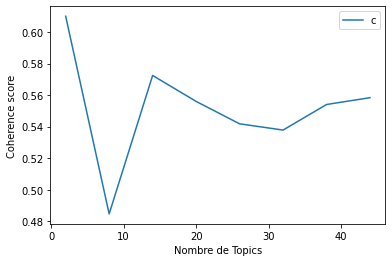

In [32]:
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Nombre de Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()